In [ ]:
!pip install pyforest
from pyforest import *
import datetime, pickle, copy, warnings
!pip install cryptocompare
import cryptocompare
from time import time
from datetime import datetime
from pandas import DataFrame, concat
from sklearn import metrics, preprocessing
from math import sqrt
!pip install pyfolio
import pyfolio as pf
!pip install backtrader
import backtrader as bt
from backtrader.feeds import PandasData
!pip install strategies
from strategies import *
import traceback
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sys, logging, json, pprint, requests
from google.colab import files
import sklearn.externals
import joblib

In [ ]:
apiKey = "43b01c420b66888ce4c91b364647600814578c186e8604322152f44c641ebbc1"
url = "https://min-api.cryptocompare.com/data/histohour"

# Original streaming data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()
pprint.pprint(result) # original data format

In [ ]:
# DATA INGESTION
print('Starting program ( hourly data)....')
print()

...
apiKey = "43b01c420b66888ce4c91b364647600814578c186e8604322152f44c641ebbc1"
url = "https://min-api.cryptocompare.com/data/histohour"

# BTC data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()

btc1 = DataFrame(result['Data'])

# 2nd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (btc1.time.head(1)-1) # result['TimeFrom'] #
}

result = requests.get(url, params=payload).json()

btc2 = DataFrame(result['Data'])

# 3rd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (btc2.time.head(1)-1)
}

result = requests.get(url, params=payload).json()

btc3 = DataFrame(result['Data'])

# 4th 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (btc3.time.head(1)-1)
}

result = requests.get(url, params=payload).json()

btc4 = DataFrame(result['Data'])

# combining BTC dataframe
com1 = btc2.append(btc1)
com2 = btc3.append(com1)
btc = btc4.append(com2)

# ETH DATA
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()
eth1 = DataFrame(result['Data'])

# 2nd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (eth1.time.head(1)-1)
}

result = requests.get(url, params=payload).json()
eth2 = DataFrame(result['Data'])

# 3rd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (eth2.time.head(1)-1)
}

result = requests.get(url, params=payload).json()
eth3 = DataFrame(result['Data'])

# 4th ETH 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (eth3.time.head(1)-1)
}

result = requests.get(url, params=payload).json()

eth4 = DataFrame(result['Data'])

# combining BTC dataframe
com1 = eth2.append(eth1)
com2 = eth3.append(com1)
eth = eth4.append(com2)

# LTC data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000
}
result = requests.get(url, params=payload).json()
ltc1 = DataFrame(result['Data'])

# 2nd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (ltc1.time.head(1)-1)
}

result = requests.get(url, params=payload).json()
ltc2 = DataFrame(result['Data'])

# 3rd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (ltc2.time.head(1)-1)
}

result = requests.get(url, params=payload).json()
ltc3 = DataFrame(result['Data'])

# 4th ETH 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (ltc3.time.head(1)-1)
}

result = requests.get(url, params=payload).json()

ltc4 = DataFrame(result['Data'])

# combining dataframe
com1 = ltc2.append(ltc1)
com2 = ltc3.append(com1)
ltc = ltc4.append(com2)


# --Data Selection
from pandas import DataFrame, concat

df = DataFrame({'ETH': eth.close})
dataframe = concat([btc, df], axis=1)
dataframe.drop(columns = ['conversionType','conversionSymbol'], axis=1, inplace=True)
dataframe.to_csv('dataframe.csv')


Starting program ( hourly data)....



In [ ]:
dataframe = pd.read_csv("dataframe.csv")
dataframe.drop(columns= 'Unnamed: 0', axis=1, inplace=True)
dataframe.tail()

<IPython.core.display.Javascript object>

,time,high,low,open,volumefrom,volumeto,close,ETH
7999,1615287600,54316.68,53966.24,54178.33,1125.30,6.097075e+07,54260.95,1828.09
8000,1615291200,54263.70,53585.07,54260.95,1731.60,9.338444e+07,53771.57,1806.94
8001,1615294800,54810.92,53690.48,53771.57,3355.46,1.825205e+08,54808.60,1840.34
8002,1615298400,54814.62,54440.72,54808.60,3815.69,2.082307e+08,54513.51,1831.57
8003,1615302000,54544.75,54196.99,54513.51,1167.84,6.350182e+07,54379.14,1823.54


In [ ]:
values = DataFrame(dataframe.close.values)
lags = 5
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dt = concat(columns, axis=1)
columns = ['Lag']
for i in range(1,(lags + 1)):
    columns.append('Lag' + str(i))
dt.columns = columns
dt.index = dataframe.index

dataframe = concat([dataframe, dt], axis=1)

# converting to pandas dataframe
dataframe['time'] = pd.to_datetime(dataframe['time'],unit='s')
dataframe.set_index('time',inplace=True)

dataframe['oc'] = (dataframe['open'] - dataframe['close']).pct_change()
dataframe['hl'] = (dataframe['high'] - dataframe['low']).pct_change()

# dataframe.loc[:,'S_10'] = dataframe.loc[:,'close'].rolling(window=10).mean()
# dataframe.loc[:,'Corr'] = dataframe.loc[:,'close'].rolling(window=10).corr(dataframe['S_10'])
dataframe.loc[:,'5EMA'] = (dataframe.loc[:,'close'].ewm(span=5,adjust=True,ignore_na=True).mean())
dataframe.loc[:,'10EMA'] = (dataframe.loc[:,'close'].ewm(span=10,adjust=True,ignore_na=True).mean())
# dataframe.loc[:,'20EMA'] = (dataframe.loc[:,'close'].ewm(span=20,adjust=True,ignore_na=True).mean())
# dataframe.loc[:,'mean'] = (dataframe.loc[:,'low'] + dataframe['high'])/2
dataframe.loc[:,'volume'] = dataframe.loc[:,'volumeto'] - dataframe.loc[:,'volumefrom']
dataframe['volume'] = (dataframe.volume).pct_change()
dataframe.drop(['volumefrom', 'volumeto'], 1, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
dataframe.dropna(inplace=True)

dataframe = dataframe.drop(['Lag'], axis=1)

dataframe = dataframe.sort_index(ascending=True)


...
# If any of the values of percentage returns equal zero, setting them to
# a small number (stops issues with LDA model)

            
# Create the shifted lag series of prior trading period close values
for i in range(0, lags):
    dataframe["Lag%s" % str(i+1)] = dataframe["close"].shift(i+1).pct_change()

dataframe['priceDifference'] = dataframe['close'].diff()
# dataframe['returns'] = dataframe['close'].pct_change()

# for i,x in enumerate(dataframe.loc[:,"returns"]):
#     if (abs(x) < 0.0001):
#         dataframe.loc[:,"returns"][i] = 0.0001


dataframe['signal'] = 0.0
dataframe["signal"] = np.where(dataframe['priceDifference']> 0, 1.0, 0.0)
# Create the lagged percentage returns columns

dataframe.to_csv('btc_data.csv') # saving data

<IPython.core.display.Javascript object>

In [ ]:
dataframe.tail(2)

,high,low,open,close,ETH,Lag1,Lag2,Lag3,Lag4,Lag5,oc,hl,5EMA,10EMA,volume,priceDifference,signal
time,,,,,,,,,,,,,,,,,
2021-03-09 14:00:00,54814.62,54440.72,54808.60,54513.51,1831.57,0.019286,-0.009019,0.001525,0.000501,0.001693,-1.284553,-0.666292,54344.411417,54056.165727,0.140862,-295.09,0.0
2021-03-09 15:00:00,54544.75,54196.99,54513.51,54379.14,1823.54,-0.005384,0.019286,-0.009019,0.001525,0.000501,-0.544647,-0.069912,54355.987611,54114.888322,-0.695041,-134.37,0.0


In [ ]:
...
df = pd.read_csv("btc_data.csv")
df.set_index('time', inplace=True)
df.sort_index(ascending=True, inplace=True)
df.index = pd.to_datetime(df.index)

"""
To limit the position on the market, it will be impossible to buy
or sell more than one time consecutively. Therefore, applied diff() to the column
signal:
"""

df.dropna(inplace=True)
MLDataFrame = df.copy()
# MLDataFrame['positions'] = MLDataFrame['signal'].diff()

# predictMovement = int(3)
# MLDataFrame['direction'] = MLDataFrame['direction'].shift(-predictMovement)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
MLDataFrame.tail(2)

,high,low,open,close,ETH,Lag1,Lag2,Lag3,Lag4,Lag5,oc,hl,5EMA,10EMA,volume,priceDifference,signal
time,,,,,,,,,,,,,,,,,
2021-03-09 14:00:00,54814.62,54440.72,54808.60,54513.51,1831.57,0.019286,-0.009019,0.001525,0.000501,0.001693,-1.284553,-0.666292,54344.411417,54056.165727,0.140862,-295.09,0.0
2021-03-09 15:00:00,54544.75,54196.99,54513.51,54379.14,1823.54,-0.005384,0.019286,-0.009019,0.001525,0.000501,-0.544647,-0.069912,54355.987611,54114.888322,-0.695041,-134.37,0.0


We will buy a share on 2021-03-08 19:00:00 for a price of	51334.11, and then sell this on 2021-03-08 22:00:00	for  a price of 51618.55. The profit of this trade is 51618.55 - 51334.11 = .

In [ ]:
MLDataFrame.dropna(inplace=True)
MLDataFrame.columns

Index(['high', 'low', 'open', 'close', 'ETH', 'Lag1', 'Lag2', 'Lag3', 'Lag4',
       'Lag5', 'oc', 'hl', '5EMA', '10EMA', 'volume', 'priceDifference',
       'signal'],
      dtype='object')

In [ ]:
...
X = np.array(MLDataFrame.drop(
    [
     'open', 
     'high',
     'low', 
     'close', 
     'signal',
     'ETH',
     'priceDifference'], axis=1
     )
)

X = X.astype(float)
# X = preprocessing.scale(X)
y = np.array(MLDataFrame['signal'])

# XpredictMovement = X[-predictMovement:]

# X = X[:-predictMovement]
# y = y[:-predictMovement]

# MLDataFrame.dropna(inplace=True)

MLDataFrame = MLDataFrame[['open', 'high', 'low', 'close', 'volume', 'signal']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install tscv
from tscv import GapKFold

In [ ]:
# # Create training and test sets
gkcv = GapKFold(n_splits=5, gap_before=2, gap_after=1)

"""
Introduced gaps between the training and test set to mitigate the temporal dependence.
Here the split function splits the data into Kfolds. 
The test sets are untouched, while the training sets get the gaps removed
"""

for trainIndex, testIndex in gkcv.split(X, y):
    xTrain, xTest = X[trainIndex], X[testIndex];
    yTrain, yTest = y[trainIndex], y[testIndex];
        
print('Observations: %d' % (len(xTrain) + len(xTest)))
print('Training Observations: %d' % (len(xTrain)))
print('Testing Observations: %d' % (len(xTest)))

Observations: 7991
Training Observations: 6393
Testing Observations: 1598


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# Create models
print("Accuracy scores/Confusion Matrices:\n")
models = [("LR", LogisticRegression(penalty='l2',C = i,random_state = 0)),
          ("LDA", LinearDiscriminantAnalysis()),
          ("QDA", QuadraticDiscriminantAnalysis()),
          ("LSVC", LinearSVC()),
          ("RSVM", SVC(C=1000000.0, cache_size=200, class_weight=None,
                       coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
                       max_iter=-1, probability=False, random_state=None,
                       shrinking=True, tol=0.001, verbose=False)),
          ("RF", RandomForestClassifier(
              n_estimators=1000, criterion='gini',
              max_depth=None, min_samples_split=2,
              min_samples_leaf=1, max_features='auto',
              bootstrap=True, oob_score=False, n_jobs=1,
              random_state=None, verbose=0))]
# iterate over the models
for m in models:
    # Train each of the models on the training set
    m[1].fit(xTrain, yTrain)
    # predictions on the test set
    pred = m[1].predict(xTest)
    # Accuracy Score and the confusion matrix for each model
    print("%s:\n%0.3f" % (m[0], m[1].score(xTest, yTest)))
    print("%s\n" % confusion_matrix(pred, yTest))


Accuracy scores/Confusion Matrices:

LR:
0.551
[[296 263]
 [455 584]]

LDA:
0.564
[[449 394]
 [302 453]]

QDA:
0.558
[[460 416]
 [291 431]]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LSVC:
0.470
[[751 847]
 [  0   0]]



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
LDA = LinearDiscriminantAnalysis()
cross_val_score(LDA, X, y, scoring='accuracy', cv=gkcv, n_jobs=-1).mean()

0.571626039741672

In [ ]:
from sklearn.model_selection import GridSearchCV

# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(LDA, grid, scoring='accuracy', cv=gkcv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.572
Config: {'solver': 'lsqr'}


In [ ]:
# grid search shrinkage for lda
from numpy import arange

# define model
LDA = LinearDiscriminantAnalysis(solver='lsqr')

# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(LDA, grid, scoring='accuracy', cv=gkcv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.572
Config: {'shrinkage': 0.0}


In [ ]:
LDA = LinearDiscriminantAnalysis().fit(xTrain, yTrain)
ypred = LDA.predict(xTest)
print(sklearn.metrics.classification_report(yTest, ypred))

              precision    recall  f1-score   support

         0.0       0.53      0.60      0.56       752
         1.0       0.60      0.54      0.57       846

    accuracy                           0.56      1598
   macro avg       0.57      0.57      0.56      1598
weighted avg       0.57      0.56      0.56      1598



In [ ]:
# confusion matrix
matrix = confusion_matrix(yTest, ypred, labels=[0, 1])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[448 304]
 [393 453]]


In [ ]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(yTest, ypred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 453 393 304 448


In [ ]:
X[-1]

array([ 1.92858419e-02, -9.01900907e-03,  1.52496395e-03,  5.01374116e-04,
        1.69331501e-03, -1.21394752e+00, -6.66291814e-01, -2.49164769e-01])

In [ ]:
LDA = LinearDiscriminantAnalysis().fit(X, y)

# Save model to file in the current working directory
fileName = "LDAModel.pkl"
joblib.dump(LDA, fileName)

# row = [-0.00580142, -0.00760914,  0.01043672, -0.00317856, -1.99782449,
#         0.82103338, -0.31687222]
# yhat = LDA.predict([row])
# yhat

['LDAModel.pkl']

To limit the position on the market, it will be impossible to buy
or sell more than one time consecutively. Therefore, applied diff() to the column Predictedsignal:

In [ ]:
# Load saved model from file
LDAModel = joblib.load('LDAModel.pkl')

MLDataFrame.loc[:,'PredictedSignal'] = LDAModel.predict(X)
MLDataFrame

,open,high,low,close,volume,signal,PredictedSignal,positions
time,,,,,,,,
2020-04-10 15:00:00,6864.99,6874.32,6758.79,6781.71,0.931279,0.0,1.0,NaN
2020-04-10 16:00:00,6781.71,6870.32,6757.67,6870.32,-0.428031,1.0,1.0,NaN
2020-04-10 17:00:00,6870.32,6910.81,6856.79,6877.05,-0.181835,1.0,1.0,0.0
2020-04-10 18:00:00,6877.05,6930.57,6866.33,6924.90,-0.271083,1.0,1.0,0.0
2020-04-10 19:00:00,6924.90,6957.91,6880.35,6918.03,0.352674,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...
2021-03-09 11:00:00,54178.33,54316.68,53966.24,54260.95,-0.437400,1.0,1.0,0.0
2021-03-09 12:00:00,54260.95,54263.70,53585.07,53771.57,0.531627,0.0,1.0,0.0
2021-03-09 13:00:00,53771.57,54810.92,53690.48,54808.60,0.954507,1.0,1.0,0.0


In [ ]:
print('Number of trades (buy) = ', (MLDataFrame['PredictedSignal']==0).sum())
print('Number of trades (sell) = ', (MLDataFrame['PredictedSignal']==1).sum())
print()

Number of trades (buy) =  2739
Number of trades (sell) =  5254



In [ ]:
# introducing differenced to restrict buy/sell
MLDataFrame.loc[:,'positions'] = MLDataFrame['PredictedSignal'].diff(2)
MLDataFrame.tail(10)


,open,high,low,close,volume,signal,PredictedSignal,positions
time,,,,,,,,
2021-03-09 06:00:00,54291.26,54480.38,53804.86,53878.15,-0.095729,0.0,1.0,0.0
2021-03-09 07:00:00,53878.15,53898.50,53466.52,53565.58,-0.107829,0.0,1.0,0.0
2021-03-09 08:00:00,53565.58,54188.36,53322.91,54059.64,0.128788,1.0,1.0,0.0
2021-03-09 09:00:00,54059.64,54314.02,53919.07,54151.18,-0.353572,1.0,1.0,0.0
2021-03-09 10:00:00,54151.18,54397.41,53936.35,54178.33,0.405366,1.0,1.0,0.0
2021-03-09 11:00:00,54178.33,54316.68,53966.24,54260.95,-0.437400,1.0,1.0,0.0
2021-03-09 12:00:00,54260.95,54263.70,53585.07,53771.57,0.531627,0.0,1.0,0.0
2021-03-09 13:00:00,53771.57,54810.92,53690.48,54808.60,0.954507,1.0,1.0,0.0
2021-03-09 14:00:00,54808.60,54814.62,54440.72,54513.51,0.140862,0.0,1.0,0.0


In [ ]:
MLDataFrame.head(10)

,open,high,low,close,volume,signal,PredictedSignal,positions
time,,,,,,,,
2020-04-10 15:00:00,6864.99,6874.32,6758.79,6781.71,0.931279,0.0,1.0,NaN
2020-04-10 16:00:00,6781.71,6870.32,6757.67,6870.32,-0.428031,1.0,1.0,NaN
2020-04-10 17:00:00,6870.32,6910.81,6856.79,6877.05,-0.181835,1.0,1.0,0.0
2020-04-10 18:00:00,6877.05,6930.57,6866.33,6924.90,-0.271083,1.0,1.0,0.0
2020-04-10 19:00:00,6924.90,6957.91,6880.35,6918.03,0.352674,0.0,0.0,-1.0
2020-04-10 20:00:00,6918.03,6932.47,6893.90,6921.22,-0.582027,1.0,0.0,-1.0
2020-04-10 21:00:00,6921.22,6945.43,6900.60,6906.53,0.002779,0.0,0.0,0.0
2020-04-10 22:00:00,6906.53,6931.25,6840.23,6871.00,0.548939,0.0,0.0,0.0
2020-04-10 23:00:00,6871.00,6887.30,6837.05,6876.49,-0.406653,1.0,1.0,1.0


 0.0    5407
 1.0    1292
-1.0    1292
Name: positions, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

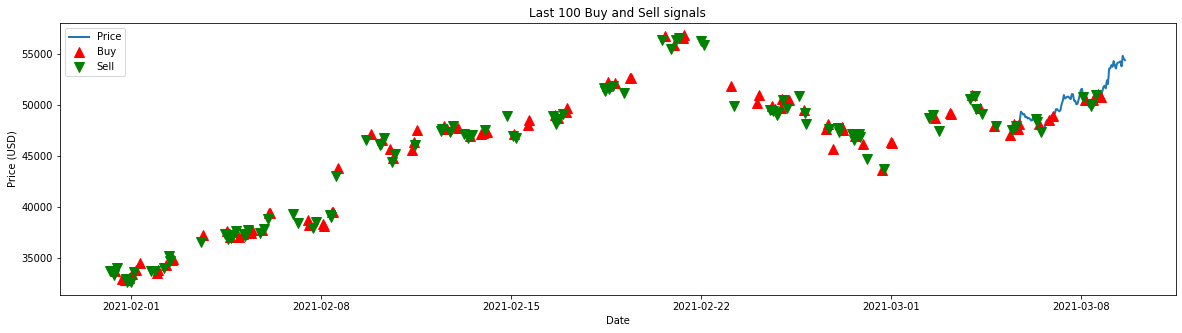

In [ ]:
%matplotlib inline
print(MLDataFrame.positions.value_counts())

# Buy/Sell signals plot
sells = MLDataFrame.loc[MLDataFrame["positions"] == -1];
buys = MLDataFrame.loc[MLDataFrame["positions"] == 1];
# Plot
fig = plt.figure(figsize=(20, 5));
plt.plot(MLDataFrame.index[-100:], MLDataFrame['close'][-100:], lw=2., label='Price');
# Plot buy and sell signals
# up arrow when we buy one share
plt.plot(buys.index[-100:], MLDataFrame.loc[buys.index]['close'][-100:], '^', markersize=10, color='red', lw=2., label='Buy');
# down arrow when we sell one share
plt.plot(sells.index[-100:], MLDataFrame.loc[sells.index]['close'][-100:], 'v', markersize = 10, color='green', lw=2., label='Sell');
plt.ylabel('Price (USD)'); plt.xlabel('Date');
plt.title('Last 100 Buy and Sell signals'); plt.legend(loc='best');
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

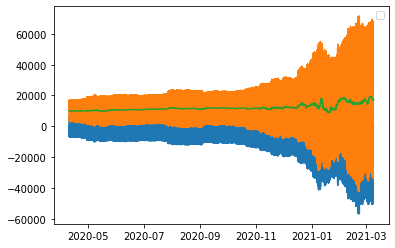

In [ ]:
initial_capital = float(10000.0)
positions = DataFrame(index=MLDataFrame.index).fillna(0.0)
portfolio = DataFrame(index=MLDataFrame.index).fillna(0.0)

positions['bitcoin'] = MLDataFrame['positions']
portfolio['positions'] = (positions.multiply(MLDataFrame['close'],axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(MLDataFrame['close'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']

plt.plot(portfolio)
plt.legend()
plt.show()

In [ ]:
...
prices = MLDataFrame.copy()

prices.drop(['signal'], 1, inplace=True)

OHLCV = ['open', 'high', 'low', 'close', 'volume']

...
# class to define the columns we will provide

class SignalData(PandasData):
    """
    Define pandas DataFrame structure
    """
    cols = OHLCV + ['positions']

    # create lines
    lines = tuple(cols)

    # define parameters
    params = {c: -1 for c in cols}
    params.update({'datetime': None})
    params = tuple(params.items())

...
# define backtesting strategy class

class ML_TestStrategy(bt.Strategy):
    params = (
        ('percents', 0.9),
        ) # Float: 1 == 100%

    
    def __init__(self):
      print('-'*32,' STRATEGY INIT ','-'*32)
      # import ipdb; ipdb.set_trace()
      '''Initializes logger and variables required for the strategy implementation.'''
      # initialize logger for log function (set to critical to prevent any unwanted autologs, not using log objects because only care about logging one thing)
      
      for handler in logging.root.handlers[:]:
          logging.root.removeHandler(handler)

      logging.basicConfig(format='%(message)s', level=logging.CRITICAL, handlers=[
          logging.FileHandler("LOG.log"),
          logging.StreamHandler()
          ]
          )
      
      self.startCash = self.broker.getvalue()
      
      
      date = self.data.datetime.date()
      close = prices.close[0]

      print('{}: Close: ${}, Position Size: {}'.format(date, close, self.position.size))

      # keep track of open, close prices and predicted value in the series
      self.data_positions = self.datas[0].positions
      self.data_open = self.datas[0].open
      self.data_close = self.datas[0].close

              
      # keep track of pending orders/buy price/buy commission
      
      self.order = None
      self.price = None
      self.stop_price = None
      self.comm = None
      self.trade = None
      self.buystop_order = None
      self.sellstop_order = None
      self.qty = 1

    # logging function

    """
    log function allows us to pass in data via the txt variable that we want to output to the screen. 
    It will attempt to grab datetime values from the most recent data point,if available, and log it to the screen.
    """
    
    def log(self, txt, doprint=True):
        '''Logging function'''
        # Logging function for the strategy.  'txt' is the statement and 'dt' can be used to specify a specific datetime
        dt = self.datas[0].datetime.datetime(0)
        print('{0},{1}'.format(dt.isoformat(), txt))
          
 

    def notify_order(self, order):
      date = self.data.datetime.datetime().date()

      """
      Run on every next iteration, logs the order execution status whenever an order is filled or rejected, 
      setting the order parameter back to None if the order is filled or cancelled to denote that there are no more pending orders.
      """
      # 1. If order is submitted/accepted, do nothing
      if order.status in [order.Submitted, order.Accepted]:
        print('-'*32,' NOTIFY ORDER ','-'*32)
        print('Order Accepted')
        print('{}, Status {}: Ref: {}, Size: {}, Price: {}'.format(
                                                        date,
                                                        order.status,
                                                        order.ref,
                                                        order.size,
                                                        'NA' if not order.price else round(order.price,5)
                                                        ))
        return
      # 2. If order is buy/sell executed, report price executed
      if order.status == order.Completed:
          print('-'*32,' NOTIFY ORDER ','-'*32)
          print('Order Completed')
          print('{}, Status {}: Ref: {}, Size: {}, Price: {}'.format(
                                                        date,
                                                        order.status,
                                                        order.ref,
                                                        order.size,
                                                        'NA' if not order.price else round(order.price,5)
                                                        ))
          print('Created: {} Price: {} Size: {}'.format(bt.num2date(order.created.dt), order.created.price,order.created.size))
          print('-'*80)
          if order.isbuy():
              self.log('BUY EXECUTED, Price: {0:8.2f}, Cost: {1:8.2f}, Comm: {2:8.2f}'.format(
                    order.executed.price,
                    order.executed.value,
                    order.executed.comm))
              
              self.buyprice = order.executed.price
              self.buycomm = order.executed.comm
            
          else:
            self.log('SELL EXECUTED, {0:8.2f}, Cost: {1:8.2f}, Comm{2:8.2f}'.format(
                    order.executed.price,
                    order.executed.value,
                    order.executed.comm))
            self.bar_executed = len(self)  # when was trade executed
            
      # 3. If order is canceled/margin/rejected, report order canceled
      elif order.status in [order.Canceled, order.Margin, order.Rejected]:
          self.log('Order Canceled/Margin/Rejected')

      

      """
      When system receives a buy or sell signal, we can instruct it to create an order. 
      However, that order won’t be executed until the next bar is called, at whatever price that may be.
      """
         
      # set no pending order
      self.order = None

      """
      The next item we will overwrite is the notify_order function. 
      This is where everything related to trade orders gets processed.
      this will log when an order gets executed, and at what price. 
      This will also provide notification in case an order didn’t go through.
      """

    def notify_trade(self, trade):
        date = self.data.datetime.datetime()
        if not trade.isclosed:
          print('-'*32,' NOTIFY TRADE ','-'*32)
          print('{}, Close Price: {}, Profit, Gross {}, Net {}'.format(
                                                date,
                                                trade.price,
                                                round(trade.pnl,2),
                                                round(trade.pnlcomm,2)))
          print('-'*80)

          return
          
          self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')

        """
        As we have predicted the market direction on the day’s closing price, hence we will use cheat_on_open=True 
        when creating the bt.Cerebro object. 
        This means the number of shares we want to buy will be based on day t+1’s open price. 
        As a result, we also define the next_open method instead of next within the Strategy class.
        """

    def next_open(self):
        if self.order:  # check if order is pending, if so, then break out
            return

      # since there is no order pending, are we in the market?
        if not self.position:
            if self.data_positions == 1:
                # calculate the max number of shares ('all-in')
                size = int(self.broker.getcash() / self.datas[0].open)
                # buy order
                self.log(f'BUY CREATED --- Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.data_positions == -1:
                # sell order
                self.log(f'SELL CREATED --- Size: {self.position.size}')
                self.sell(size=self.position.size)

"""
Code commentary:
 - The function __init__ tracks open, close, predicted, and pending orders.
 - The function notify_order tracks the order status.
 - The function notify_trade is triggered if the order is complete and logs profit and loss for the trade.
 - The function next_open checks the available cash and calculates the maximum number of shares that can be bought. 
It places the buy order if we don’t hold any position and the predicted value is > zero. 
Else, it places the sell order if the predicted value < zero.
"""
def printTradeAnalysis(analyzer):
    '''
    Function to print the Technical Analysis results in a nice format.
    '''
    # Get the results we are interested in
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lose_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total,2)
    strike_rate = (total_won / total_closed) * 100
    
    # Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate','Win Streak', 'Losing Streak', 'PnL Net']
    r1 = [total_open, total_closed,total_won,total_lost]
    r2 = [strike_rate, win_streak, lose_streak, pnl_net]
    
    # Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    
    # Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<20}" * (header_length + 1)
    
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))
 
def printSQN(analyzer):
    sqn = round(analyzer.sqn,2)
    print('SQN: {}'.format(sqn))

...
# instantiate SignalData class

data = SignalData(dataname=prices)

def runstrat():

    # Variable for our starting cash

    startCash = 100000.0

    # instantiate Cerebro, add strategy, data, initial cash, commission and pyfolio for performance analysis

    NIKLAS = bt.Cerebro(stdstats = False, cheat_on_open=True, maxcpus=1)
    # NIKLAS.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio')
    NIKLAS.addstrategy(ML_TestStrategy)
    NIKLAS.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

    # Add the analyzers we are interested in
    NIKLAS.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
    NIKLAS.addanalyzer(bt.analyzers.SQN, _name="sqn")
    NIKLAS.addobserver(bt.observers.Value)
    NIKLAS.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    NIKLAS.addanalyzer(bt.analyzers.Returns)
    NIKLAS.addanalyzer(bt.analyzers.DrawDown)
    
    NIKLAS.adddata(data)

    # Set desired cash start

    NIKLAS.broker.setcash(startCash)
    NIKLAS.broker.setcommission(commission=0.001)
    
    startPortfolioValue = NIKLAS.broker.getvalue()
    print('Starting Portfolio Value:', startPortfolioValue)
    print()
    
    strategies = NIKLAS.run(runonce=False)

    firstStrat = strategies[0]

    # print the analyzers
    print()
    printTradeAnalysis(firstStrat.analyzers.ta.get_analysis())
    printSQN(firstStrat.analyzers.sqn.get_analysis())

    # Get final portfolio Value
    endPortfolioValue = NIKLAS.broker.getvalue()
    print()
    print(f'Final Portfolio Value: {endPortfolioValue:.2f}')
        
    pnl = endPortfolioValue - startPortfolioValue
    print()
    print(f'PnL: {pnl:.2f}') 


    # NIKLAS.plot(style='candlestick', barup='green', bardown='red')[0][0].savefig('samplefigure.png', dpi=300)
    # files.download('samplefigure.png')


if __name__ == '__main__':
    runstrat()


Streaming output truncated to the last 5000 lines.
--------------------------------------------------------------------------------
2020-12-26T19:00:00,BUY EXECUTED, Price: 25601.76, Cost: 256017.60, Comm:   256.02
--------------------------------  NOTIFY TRADE  --------------------------------
2020-12-26 19:00:00, Close Price: 25601.76, Profit, Gross 0.0, Net -256.02
--------------------------------------------------------------------------------
2020-12-27T07:00:00,SELL CREATED --- Size: 10
--------------------------------  NOTIFY ORDER  --------------------------------
Order Accepted
2020-12-27, Status 1: Ref: 3610, Size: -10, Price: NA
--------------------------------  NOTIFY ORDER  --------------------------------
Order Accepted
2020-12-27, Status 2: Ref: 3610, Size: -10, Price: NA
--------------------------------  NOTIFY ORDER  --------------------------------
Order Completed
2020-12-27, Status 4: Ref: 3610, Size: -10, Price: NA
Created: 2020-12-27 07:00:00 Price: 27582.1 Size: -